Ejercicio Final Módulo 3
Nombre: María Fernanda Marti Levalle

 Los Datos
 * *Customer Loyalty History.csv
 * *Customer Flight Activity.csv

In [98]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # para poder visualizar todas las filas de los DataFrames


 ## Fase 1: Exploración y Limpieza
 1. Exploración Inicial:
 - Realiza una exploración inicial de los datos para identificar posibles problemas, 
como valores nulos, atípicos o datos faltantes en las columnas relevantes.
 - Utiliza funciones de Pandas para obtener información sobre la estructura de los 
datos, la presencia de valores nulos y estadísticas básicas de las columnas 
involucradas.
 - Une los dos conjuntos de datos de la forma más eficiente.
 


Cargamos los dos conjuntos de datos: 

In [99]:
# Exploración inicial del archivo "Customer Flight Activity.csv"

dfa = pd.read_csv("Customer Flight Activity.csv", index_col = 0)
dfa.head(2)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0


In [100]:
print("\nInformación del DataFrame 'Customer Flight Activity':")
print(dfa.info())
print("\nEstadísticas descriptivas del DataFrame 'Customer Flight Activity':")
print(dfa.describe())
print(dfa.columns)


Información del DataFrame 'Customer Flight Activity':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB
None

Estadísticas descriptivas del DataFrame 'Customer Flight Activity':
                Year          Month  Flights Booked  Fli

Resultados de la exploración inicial del conjunto de datos "Customer Flight Activity":

No hay valores nulos en ninguna columna.
Los datos están bien estructurados y no se observan problemas evidentes en esta exploración inicial.

In [101]:
# Exploración inicial del archivo "Customer Flight Activity.csv"

dfb = pd.read_csv("Customer Loyalty History.csv", index_col = 0)
dfb.head(2)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [102]:
print("\nInformación del DataFrame 'Customer Loyalty History':")

print(dfb.info())

print("\nEstadísticas descriptivas del DataFrame 'Customer Loyalty History':")
print(dfb.describe())

print(dfb.columns)


Información del DataFrame 'Customer Loyalty History':


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage

In [103]:
# Unión de los dos conjuntos de datos con base en las etiquetas de su índice("Loyalty Number"): 

df= pd.merge(dfa, dfb, left_index=True, right_index=True)
df.head(2)


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [104]:
# Utilizo reset_index para restablecer el índice del  DataFrame. Aplico inplace=True, asi los cambios se aplicarán directamente al DataFrame df 

df.reset_index(inplace=True)
df.head(2)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [105]:
# Uso el método '.columns', que devuelve un array con todos los nombres de las columnas del Dataframe.

df.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [106]:
# Utilizo el método".shape" que me permite saber cuántas filas y columnas tenemos en el DataFrame. 

print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")

El número de filas que tenemos es 405624, y el número de columnas es 25


In [107]:
# Creo una función para la exploraración inicial del conjunto de dato .
def exploracion_inicial(dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    
    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    print(f"El número de filas y columnas del df son : {df.shape}")
    print("\n ..................... \n")
    
    # Defino un DataFrame para los valores nulos
    print("Los valores nulos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    # Defino un DataFrame para tipos de datos
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))

    # Principales estadisticos de todas las columnas
    print("\n ..................... \n")

    # Estadisticos de las columnas numericas
    print(f"Estadísticos columnas numéricas")
    display(df.describe().T)
    print("\n ..................... \n")

    # Estadisticos de las columnas categóricas
    print(f"Estadisticos columnas categóricas")
    display(df.describe(include = "O").T)
    
    print("\n ..................... \n")
    print("Los valores resultantes para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene los siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())  
          
exploracion_inicial(df)


Los duplicados en el conjunto de datos son: 1864

 ..................... 

El número de filas y columnas del df son : (405624, 25)

 ..................... 

Los valores nulos en el conjunto de datos son:


,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Estadísticos columnas numéricas


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00



 ..................... 

Estadisticos columnas categóricas


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200



 ..................... 

Los valores resultantes para las columnas categóricas son: 
La columna COUNTRY tiene los siguientes valores únicos:


,Country
Canada,405624


La columna PROVINCE tiene los siguientes valores únicos:


,Province
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene los siguientes valores únicos:


,City
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL CODE tiene los siguientes valores únicos:


,Postal Code
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene los siguientes valores únicos:


,Gender
Female,203640
Male,201984


La columna EDUCATION tiene los siguientes valores únicos:


,Education
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL STATUS tiene los siguientes valores únicos:


,Marital Status
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY CARD tiene los siguientes valores únicos:


,Loyalty Card
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene los siguientes valores únicos:


,Enrollment Type
Standard,382200
2018 Promotion,23424


Resumen del análisis EDA:

- La columna "Country" tiene un único valor (Canadá), lo que me lleva a pensar que no es necesaria. Por lo cual eliminaré la misma del conjunto de datos en la fase de limpieza. 
- La columna "Salary" presenta un porcentaje de nulos del 25% aproximadamente y además los datos estadísticos muestran que hay valores negativos, analizaré cómo gestionarla.
- Las columnas "Cancellation Year" y "Cancellation Month" tiene un porcentaje muy alto de nulos, cerca del 88%, tendré en cuenta cómo se pueden gestionar.

 2. Limpieza de Datos:
 - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar 
que los datos estén completos.
 - Verifica la consistencia y corrección de los datos para asegurarte de que los 
datos se presenten de forma coherente.
 - Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, 
cambiar tipos de datos) para garantizar la adecuación de los datos para el 
análisis estadístico.


In [108]:
# Elimino la colunma "Country" 
df.drop(['Country'], axis=1, inplace=True)

In [109]:
# Cambio el formato de las columnas, convirtiendo todas a minúsculas usando el método '.lower' y reemplazo los espacios en blanco por guiones bajo con el método '.replace'. Así tienen el mismo formato todas las columnas. 

format_columnas = [col.lower().replace(" ", "_") for col in df.columns]
df.columns = format_columnas
df.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [110]:
# También necesito reemplazar los espacios en blanco por guiones bajos en todas las columnas que contengan datos de tipo 'objet', usaré un ciclo 'for' junto con la función str.replace.
# Listo las columnas a limpiar:
columnas_a_limpiar = ['province', 'city', 'postal_code', 'gender', 'education', 'marital_status', 'loyalty_card', 'enrollment_type']
for columna in columnas_a_limpiar:
    # Reemplazo espacios y convierto a minúsculas(uso astype para asegurarme que sean tipo string):
    df[columna] = df[columna].astype(str).str.replace(' ', '_').str.lower()
df.head(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,NaN,NaN


In [111]:
#La función abs() devuelve el valor absoluto de un número, convirtiendo los valores negativos en positivos.

df['salary'] = df['salary'].abs()
print(df['salary'].describe())

count    302952.000000
mean      79381.440228
std       34735.904533
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88612.000000
max      407228.000000
Name: salary, dtype: float64


In [112]:
# Defino las columnas a convertir a float
columnas_a_float = ['dollar_cost_points_redeemed', 'points_redeemed', 'distance']

# Convierto las columnas a float64
df[columnas_a_float] = df[columnas_a_float].astype('float64')

# Mostrar las primeras filas para verificar
print(df.dtypes)
print(df.head())

loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                       float64
points_accumulated             float64
points_redeemed                float64
dollar_cost_points_redeemed    float64
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year              float64
cancellation_month             float64
dtype: object
   loyalty_number  year  month  flights_booked  fl

In [113]:
# Verifico la consistencia de los datos
print(df['year'].unique())
print(df['month'].unique())

df = df[(df['year'] <= 2024)]
df = df[(df['month'] >= 1) & (df['month'] <= 12)]


[2017 2018]
[ 1  2 10  4  5  6  7  9  8 11 12  3]


In [114]:
# Recuerdo en número de filas duplicadas:
duplicados = df.duplicated()
numero_duplicados = duplicados.sum()
print("Número total de filas duplicadas:", numero_duplicados)

Número total de filas duplicadas: 1864


In [115]:
# Cuento las filas
total_filas = df.shape[0]
print(total_filas)
# Calcular porcentaje de duplicados
porcentaje_duplicados = (numero_duplicados / total_filas) * 100
print("Porcentaje de filas duplicadas:", porcentaje_duplicados, "%")

405624
Porcentaje de filas duplicadas: 0.4595388833007909 %


In [116]:
# Procedo a la eliminación de los datos duplicados

df.drop_duplicates(inplace=True)

# Verifico si se han eliminado
df.shape

(403760, 24)

In [117]:
# Reemplazo "unknown_date" con NaN
df['cancellation_year'].replace("unknown_date", np.nan, inplace=True)
df['cancellation_month'].replace("unknown_date", np.nan, inplace=True)

# Convierto las columnas a tipo float
df['cancellation_year'] = pd.to_numeric(df['cancellation_year'], errors='coerce')
df['cancellation_month'] = pd.to_numeric(df['cancellation_month'], errors='coerce')

# Convierto las columnas de tipo float a tipo entero
df['cancellation_year'] = df['cancellation_year'].astype('Int64')
df['cancellation_month'] = df['cancellation_month'].astype('Int64')


In [118]:
# Ahora investigaré qué hacer con las columnas que presentan altos porcentajes de nulos, 'cancellation_year' y 'cancellation_month'
# Ya que no contamos con un diccionario y tampoco tenemos acceso, circunstancialmente, a consulta con el cliente, intentaré tomar mis decisiones respecto a estas columnas.

print(df['cancellation_year'].unique())
print(df['cancellation_month'].unique())

<IntegerArray>
[<NA>, 2018, 2015, 2016, 2014, 2017, 2013]
Length: 7, dtype: Int64
<IntegerArray>
[<NA>, 3, 8, 6, 9, 2, 7, 10, 1, 4, 12, 11, 5]
Length: 13, dtype: Int64


In [119]:
# Voy a suponer que, estas columnas referencian los años y los meses de la cancelación de clientes a un programa de fidelidad. Para fines de consistencia de los datos voy a sustituir los valores faltantes con la etiqueta 'unknown'.
# Reemplazar valores nulos con 'unknown' en columnas específicas
#df[['cancellation_year', 'cancellation_month']] = df[['cancellation_year', 'cancellation_month']].fillna('unknown_date')


In [120]:
# Verifico que ya no hayan nulos:
#df['cancellation_year'].isnull().sum() / df.shape[0]
#df['cancellation_month'].isnull().sum() / df.shape[0]

In [121]:
# Columna 'salary', analizaré cómo puedo gestionar los valores nulos que suman un 25% del total de los datos.
print(df['salary'].isnull().sum())

102260


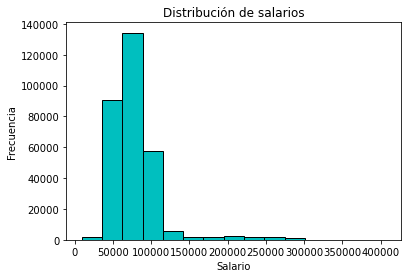

In [122]:
# Para visualizar de manera más optima la distribución de los datos de la columna 'salary' usaré un histograma:
# Seleccionar la columna 'salary'
salary_data = df['salary']

# Crear el histograma
plt.hist(salary_data,
         bins = 15, 
         color = 'c',
         edgecolor = 'black')

# Agregar título y etiquetas de eje
plt.title('Distribución de salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

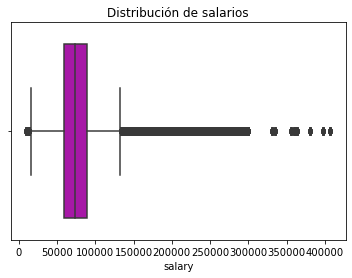

In [123]:
sns.boxplot(x='salary', data=df, color= 'm')
plt.title('Distribución de salarios')
plt.show()

Basándome en la forma de los gráficos, se puede inferir que la mayoría de los salarios se encuentran dentro de un rango específico, con una menor cantidad de salarios en los extremos inferior y superior de la distribución. Esto podría indicar que existe una cierta homogeneidad en los niveles de ingresos dentro del conjunto de datos.
Utilizaré el método de imputación por la Mediana. La mediana es un valor estadísticamente representativo de la distribución de los datos, ya que no se ve afectado por valores atípicos extremos. 
Sustitución de valores nulos: Al utilizar la mediana para imputar los valores nulos, se reemplazan por un valor que se encuentra dentro del rango de salarios observados, sin introducir sesgos o distorsionar la forma de la distribución.

In [124]:
# Calculo la mediana
mediana_salary = df['salary'].median()

# Reemplazo los valores nulos con la mediana
df['salary'].fillna(mediana_salary, inplace=True)


In [125]:
# Verifico que ya no hayan nulos:
print(df['salary'].isnull().sum())

0


In [126]:
# Guardo esta versión del Dataframe con los cambios que he realizado hasta el momento en un documento de tipo csv.
df.to_csv('df.csv')
df.head(2)


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521.0,152.0,0.0,0.0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,<NA>,<NA>
1,100018,2017,2,2,2,4,1320.0,132.0,0.0,0.0,alberta,edmonton,t9g_1w3,female,bachelor,92552.0,married,aurora,7919.2,standard,2016,8,<NA>,<NA>



    Fase 2: Visualización
 Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las 
siguientes gráficas usando la mejor gráfica que consideres:



 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [127]:
# Agrupo los datos por mes y año, calculando la cantidad total de vuelos reservados
reservas_por_mes_año = df.groupby(['month', 'year'])['flights_booked'].sum().unstack()
reservas_por_mes_año

year,2017,2018
month,,
1,47766,49170
2,47691,48643
3,64271,66928
4,55720,56791
5,65279,76891
6,80493,92749
7,89288,104143
8,78692,90512
9,63304,73075


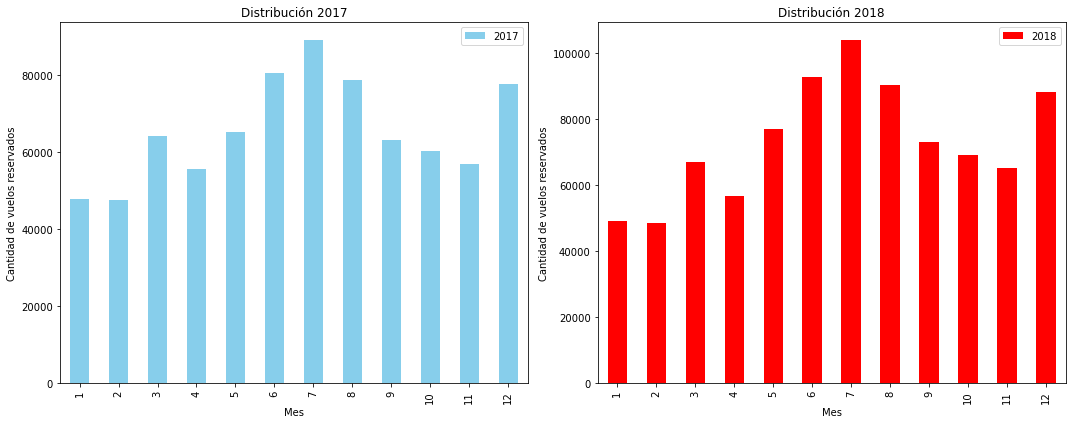

In [128]:

# Creo dos gráficos de barras, uno para cada año:

# Crea la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Ajusta el tamaño de la figura

# Crea el gráfico para 2017 en el primer subplot
ax = axes[0]
reservas_2017 = reservas_por_mes_año[2017]
reservas_2017.plot(kind='bar', color='skyblue', ax=ax, label='2017')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de vuelos reservados')
ax.set_title('Distribución 2017')
ax.legend()

# Crea el gráfico para 2018 en el segundo subplot
ax = axes[1]
reservas_2018 = reservas_por_mes_año[2018]
reservas_2018.plot(kind='bar', color='red', ax=ax, label='2018')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de vuelos reservados')
ax.set_title('Distribución 2018')
ax.legend()

# Ajusta el espacio entre subplots
plt.tight_layout()

plt.show()


A partir del análisis de los gráficos podemos observar cómo se distribuyen las reservas de vuelos por cada mes en cada uno de los años contenidos en el conjunto de datos. Se ve que la distribución es similar en cada uno de ellos, siendo julio el mes que más reservas se han hecho en ambos años.



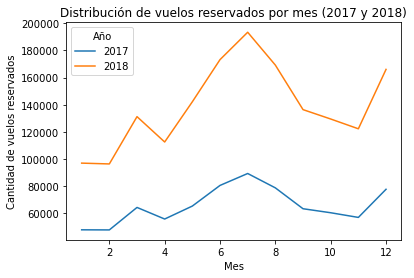

In [129]:
# Para visualizar mejor la diferencia de vuelos reservados en los diferentes años, realizo el siguiente gráfico de lineas
reservas_por_mes_año.plot(kind='line', stacked=True)
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos reservados')
plt.title('Distribución de vuelos reservados por mes (2017 y 2018)')
plt.legend(title='Año')
plt.show()


Por otra parte en este gráfico se observa que en el año 2018 se han reservado más cantidad de vuelos que en 2017.

 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los 
clientes?


Correlación entre distancia y puntos acumulados: 0.9945458005650538


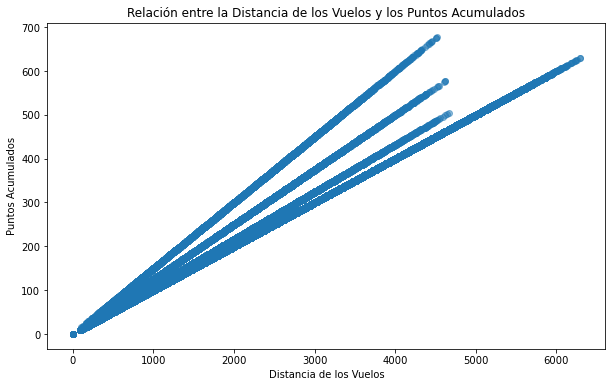

In [130]:
# Calculo la correlación entre distancia y puntos acumulados
#La función corr() permite especificar el tipo de coeficiente de correlación a calcular. Por defecto, utiliza la correlación de Pearson, que es adecuada para relaciones lineales entre variables con distribución normal.
correlacion = df['distance'].corr(df['points_accumulated'])
print(f"Correlación entre distancia y puntos acumulados: {correlacion}")

# Creo un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'], df['points_accumulated'], alpha=0.5)
plt.xlabel('Distancia de los Vuelos')
plt.ylabel('Puntos Acumulados')
plt.title('Relación entre la Distancia de los Vuelos y los Puntos Acumulados')
#plt.grid(True)
plt.show()

El resultado de la correlación indica que existe una fuerte relación positiva entre la distancia recorrida en los vuelos y la cantidad de puntos acumulados por los usuarios. Aunque este resultado no es signo de causalidad, es decir que no podemos dar por sentado que los usuarios con más puntos acumulados recorran mayores distancia con este análisis, deberíamos, para ello realizar análisis más complejos si el cliente lo solicitara.

 ¿Cuál es la distribución de los clientes por provincia o estado?

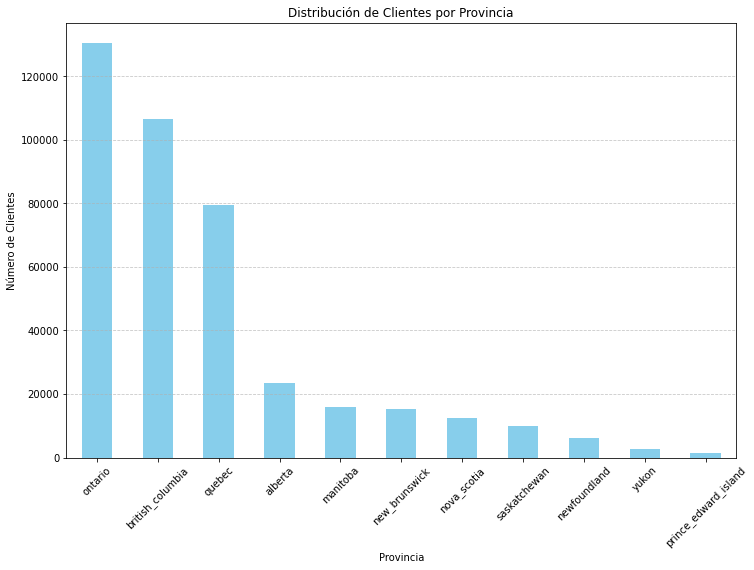

In [131]:
# Agrupo y cuento el número de clientes por provincia o estado
distribucion_por_provincia = df['province'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
distribucion_por_provincia.plot(kind='bar', color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Clientes por Provincia')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La distribución de clientes por provincia muestra una concentración de clientes en las provincias de Canadá, con Ontario, Quebec y British Columbia siendo las regiones con mayor presencia. 

 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los 
clientes?


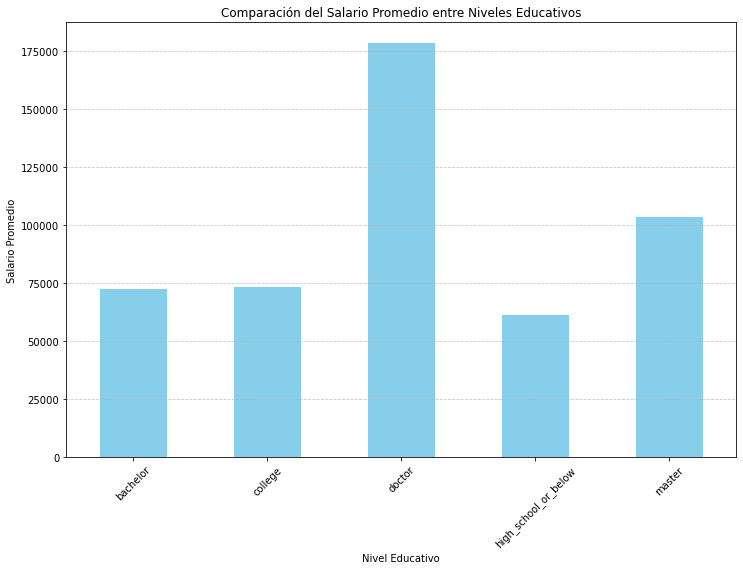

In [132]:
# Agrupo por nivel educativo y calcular el salario promedio
education_salary = df.groupby('education')['salary'].mean()
education_salary
# Creo un gráfico de barras
plt.figure(figsize=(12, 8))
education_salary.plot(kind='bar', color='skyblue')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación del Salario Promedio entre Niveles Educativos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


El gráfico nos muestra la distribución del salario promedio según el nivel de educación de los clientes. No obstante, recuerdo que los datos de la columna 'salary' han sido manipulados a causa del 25% aprox. de valores nulos, que fueron sustituidos con el método de imputación de la mediana, de acuerdo a los resultados obtenidos se puede concluir que aquellos clientes que poseen un doctorado se distinguen del resto con un salario promedio bastante superior, seguido de aquellos que poseen un master, cuya diferencia es notable respecto del resto de los niveles educativos.


 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
 


In [133]:
#agrupamos por el tipo de tarjeta y luego contamos las que hay en cada categoria
df_proporcion = df.groupby('loyalty_card')["loyalty_number"].count().reset_index()
df_proporcion


,loyalty_card,loyalty_number
0,aurora,83132
1,nova,136883
2,star,183745


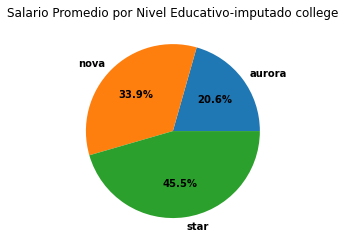

In [134]:
# Uso gráfico de quesitos(torta)

plt.pie("loyalty_number", labels= "loyalty_card",data = df_proporcion, autopct=  '%1.1f%%',textprops={'fontsize': 10, 'color': 'black', 'weight': 'bold'})
plt.title('Salario Promedio por Nivel Educativo-imputado college');


 ¿Cómo se distribuyen los clientes según su estado civil y género?
 


married     234845
single      108153
divorced     60762
Name: marital_status, dtype: int64
married     58.164504
single      26.786457
divorced    15.049039
Name: marital_status, dtype: float64


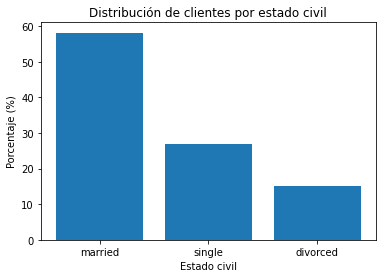

In [135]:
# Obtengo las columnas de estado civil y género
estado_civil = df['marital_status']
genero = df['gender']

# Creo una tabla de frecuencias para el estado civil
tabla_estado_civil = estado_civil.value_counts().sort_values(ascending=False)
print(tabla_estado_civil)

# Calculo los porcentajes para el estado civil
porcentajes_estado_civil = tabla_estado_civil / len(df) * 100
print(porcentajes_estado_civil)

# Creo un gráfico de barras para el estado civil
plt.bar(tabla_estado_civil.index, porcentajes_estado_civil)
plt.xlabel('Estado civil')
plt.ylabel('Porcentaje (%)')
plt.title('Distribución de clientes por estado civil')
plt.show()

La distribución según el estado civil de los clientes queda reflejado en el gráfico mostrando el mayor porcentaje correspondiente a personas casadas con el 58% aprox., le sigue la categoría de solteros con un 26% y finalmente el menor grupo con un 15%. 

female    202757
male      201003
Name: gender, dtype: int64
female    50.217208
male      49.782792
Name: gender, dtype: float64


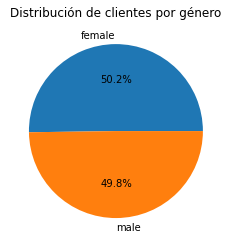

In [136]:
# Creo una tabla de frecuencias para el género
tabla_genero = genero.value_counts().sort_values(ascending=False)
print(tabla_genero)

# Calculo los porcentajes para el género
porcentajes_genero = tabla_genero / len(df) * 100
print(porcentajes_genero)

# Creo un gráfico de sectores para el género
plt.pie(porcentajes_genero, labels=tabla_genero.index, autopct="%1.1f%%")
plt.title('Distribución de clientes por género')
plt.show()

Como se puede apreciar el porcentaje de mujeres y hombres en el conjunto de datos son prácticamente iguales.
Ahora quisiera saber cómo se distribuyen los datos combinados. A continuación desarrollo el análisis.

gender          female    male
marital_status                
divorced         30634   30128
married         117363  117482
single           54760   53393


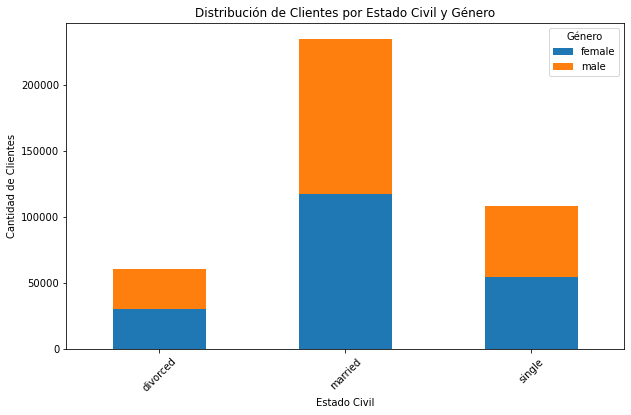

In [137]:
# Visualizo los datos agrupando por estado civil y genero, usando un gráfico de barras combinadas.

agrupado = df.groupby(["marital_status", "gender"])
numero_clientes = agrupado.size().unstack()# .size cuenta el número de filas en cada grupo.unstack() convierte el resultado en un DataFrame con las columnas "estado_civil" y "genero" como índice y el número de clientes en cada grupo como valores.
print(numero_clientes)
numero_clientes.plot(kind="bar", stacked=True, figsize=(10, 6))

# Titulo y etiqueto los ejes
plt.title('Distribución de Clientes por Estado Civil y Género')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)  # grado de rotación de las etiquetas del eje x para mayor legibilidad

# Muestro el gráfico
plt.legend(title='Género')

La frecuencia de datos de los diferentes grupos según su estado civil y su género tiende a ser homogénea para hombres y mujeres, presentando mayor presencia de casados, seguido de solteros y en un menor porcentaje divorciados.

 - Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
 Objetivo del Ejercicio:
 Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias 
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para 
ello, los pasos que deberas seguir son:


9. Preparación de Datos:
 - Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 
'Flights Booked' y 'Education'.


In [138]:
# Selecciona las columnas relevantes
df_filtrado = df[['flights_booked', 'education']]
df_filtrado.head()

,flights_booked,education
0,3,bachelor
1,2,bachelor
2,6,bachelor
3,4,bachelor
4,0,bachelor


In [139]:
df_filtrado.to_csv('df_filtrado.csv')



 10. Análisis Descriptivo:
 - Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas 
(como el promedio, la desviación estandar, los percentiles) del número de vuelos 
reservados para cada grupo.


In [140]:
# Agrupo los datos por nivel educativo según el número de vuelos reservados para cada grupo.

df_vuelos_por_educacion1 = df_filtrado.groupby("education")['flights_booked'].describe()
df_vuelos_por_educacion1

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
college,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
high_school_or_below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


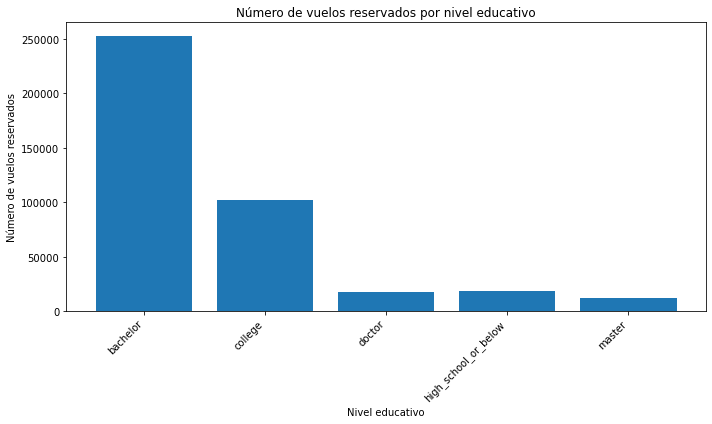

In [141]:
# Gráfico de barras para los grupos:
df_vuelos_por_educacion = df.groupby('education')["flights_booked"].count()  

plt.figure(figsize=(10, 6))  
plt.bar(df_vuelos_por_educacion.index, df_vuelos_por_educacion.values)
plt.xlabel("Nivel educativo")
plt.ylabel("Número de vuelos reservados")
plt.title("Número de vuelos reservados por nivel educativo")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()


Para todos los niveles de educación se presentan valores estadísticos similares, pero la mayor cantidad de reservas viene dada por los grupos "bachelor" y "college".

In [142]:
df_filtrado["nivel_educativo"] = df_filtrado["education"].apply(lambda dato: "Nivel alto" if dato in ["doctor", "master", "bachelor"] else "Nivel bajo")
df_filtrado.head()

,flights_booked,education,nivel_educativo
0,3,bachelor,Nivel alto
1,2,bachelor,Nivel alto
2,6,bachelor,Nivel alto
3,4,bachelor,Nivel alto
4,0,bachelor,Nivel alto


In [143]:
for col in df_filtrado["nivel_educativo"].unique():
    print(f"Educacion de {col}")
    print(df_filtrado[df_filtrado["nivel_educativo"] ==  col]["flights_booked"].describe())
    print("\n--------------------------------\n")

Educacion de Nivel alto
count    282585.000000
mean          4.118311
std           5.223592
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64

--------------------------------

Educacion de Nivel bajo
count    121175.000000
mean          4.170753
std           5.244962
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64

--------------------------------



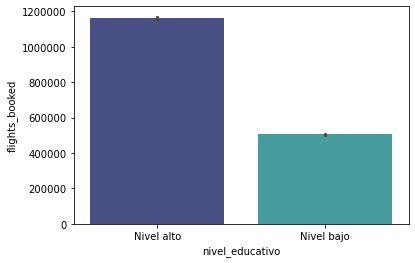

In [144]:
df1 = df_filtrado[["nivel_educativo", "flights_booked"]]
sns.barplot(x = "nivel_educativo", 
            y = "flights_booked",
              data = df1, 
              palette = "mako", estimator = sum)

plt.ticklabel_format(style='plain', axis='y')
# Diseó un barplot para mostrar la suma del número de vuelos reservados por cliente


 11. Prueba Estadística:
 -  Realiza una prueba de A/B testing para determinar si existe una diferencia 
significativa en el número de vuelos reservados entre los diferentes niveles 
educativos.


Establecemos las hipotesis:
   H0: No existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos
   H1: Si existe una diferencia significativa

si p_value < 0.05 -> se rechaza la H0
si p_value > 0.05 -> se mantiene la H0


In [148]:
import pandas as pd
from scipy import stats
# Separo los datos en dos grupos
nivel_alto = df_filtrado[df_filtrado["nivel_educativo"] == "Nivel alto"]["flights_booked"]
nivel_bajo = df_filtrado[df_filtrado["nivel_educativo"] == "Nivel bajo"]["flights_booked"]

# Realizo la prueba t-test
t_stat, p_value = stats.ttest_ind(nivel_alto, nivel_bajo, equal_var=False)

t_stat, p_value


(-2.9153100033342065, 0.0035536989927629375)

Los resultados de la prueba t-test son los siguientes:

Estadístico t: -2.915
Valor p: 0.00355
Interpretación de Resultados
El valor p (0.00355) es menor que el nivel de significancia comúnmente utilizado (0.05), lo que indica que hay evidencia estadísticamente significativa para rechazar la hipótesis nula. Esto sugiere que existe una diferencia significativa en el número de vuelos reservados entre los clientes con niveles educativos "Nivel alto" y "Nivel bajo".

Conclusión
Con base en estos resultados, podemos concluir que el nivel educativo tiene un impacto significativo en el número de vuelos reservados por los clientes. Los clientes con niveles educativos más altos ("Nivel alto") reservan una cantidad de vuelos diferente comparado con aquellos con niveles educativos más bajos ("Nivel bajo").